In [1]:
# read from arch2.txt
arch = open('arch2.txt', 'r').read()

datums = arch.strip().strip(',').split(',')

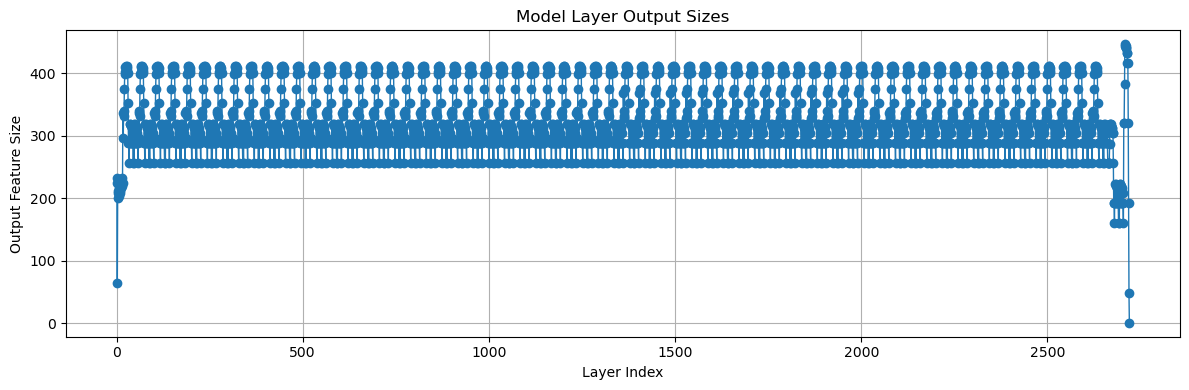

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Convert to list of ints
features = list(map(int, datums))

# Group into (in, out) pairs
pairs = list(zip(features[:-1:2], features[1::2]))

# Count unique transitions
pattern_counts = Counter(pairs)

# Prepare for plotting
x_vals = list(range(len(pairs)))
y_vals = [out for _, out in pairs]

# Plotting the output feature sizes across the model
plt.figure(figsize=(12, 4))
plt.plot(x_vals, y_vals, marker='o', linewidth=1)
plt.title("Model Layer Output Sizes")
plt.xlabel("Layer Index")
plt.ylabel("Output Feature Size")
plt.grid(True)
plt.tight_layout()
plt.show()

# # Display pattern counts as a table
# import pandas as pd
# df_patterns = pd.DataFrame(pattern_counts.items(), columns=["(in, out)", "count"])
# df_patterns = df_patterns.sort_values("count", ascending=False)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Unique Layer Transitions", dataframe=df_patterns)


In [ ]:
from collections import Counter
from itertools import combinations

seq = list(map(int, datums))

def all_subsequences(s):
    subseqs = set()
    for r in range(1, len(s)+1):
        for i in combinations(range(len(s)), r):
            subseqs.add(''.join(s[j] for j in i))
    return subseqs

from collections import Counter
from collections import Counter

def top_k_repeated_blocks(arr, k):
    n = len(arr)
    counter = Counter()
    for size in range(1, n // 2 + 1):
        for i in range(n - size * 2 + 1):
            block = tuple(arr[i:i + size])
            next_block = tuple(arr[i + size:i + 2 * size])
            if block == next_block:
                counter[block] += 1
    return [list(block) for block, _ in counter.most_common(k)]


def top_k_repeated_blocks(arr, k, min_block_size=10):
    n = len(arr)
    counter = Counter()
    for size in range(min_block_size, n // 2 + 1):
        for i in range(n - size * 2 + 1):
            block = tuple(arr[i:i + size])
            next_block = tuple(arr[i + size:i + 2 * size])
            if block == next_block:
                counter[block] += 1
    return [list(block) for block, _ in counter.most_common(k)]

# print(seq[0:2000])
# # blocks = top_k_repeated_blocks(seq[0:2000], 100)
# for block in blocks:
#     print(block)


# print(seq[0:100])


[55, 224, 224, 232, 232, 64, 64, 208, 208, 200, 200, 212, 212, 204, 204, 216, 216, 208, 208, 220, 220, 212, 212, 224, 224, 216, 216, 228, 228, 220, 220, 232, 232, 224, 224, 336, 336, 296, 296, 340, 340, 332, 332, 375, 375, 399, 399, 410, 410, 402, 402, 412, 412, 404, 404, 412, 412, 404, 404, 408, 408, 400, 400, 352, 352, 288, 288, 288, 288, 256, 256, 319, 319, 288, 288, 318, 318, 288, 288, 316, 316, 288, 288, 312, 312, 288, 288, 304, 304, 288, 288, 256, 256, 288, 288, 256, 256, 319, 319, 288, 288, 318, 318, 288, 288, 316, 316, 288, 288, 312, 312, 288, 288, 304, 304, 288, 288, 256, 256, 336, 336, 296, 296, 340, 340, 332, 332, 375, 375, 399, 399, 410, 410, 402, 402, 412, 412, 404, 404, 412, 412, 404, 404, 408, 408, 400, 400, 352, 352, 288, 288, 288, 288, 256, 256, 319, 319, 288, 288, 318, 318, 288, 288, 316, 316, 288, 288, 312, 312, 288, 288, 304, 304, 288, 288, 256, 256, 288, 288, 256, 256, 319, 319, 288, 288, 318, 318, 288, 288, 316, 316, 288, 288, 312, 312, 288, 288, 304, 304, 288, 28

In [22]:
from string import ascii_uppercase

def generate_var_names(n):
    names = []
    for i in range(n):
        name = ''
        x = i
        while True:
            name = ascii_uppercase[x % 26] + name
            x = x // 26 - 1
            if x < 0:
                break
        names.append(name)
    return names

def replace_blocks_with_vars(seq, blocks):
    var_names = generate_var_names(len(blocks))
    var_map = {tuple(block): var_names[i] for i, block in enumerate(blocks)}
    i = 0
    out = []
    while i < len(seq):
        replaced = False
        for block, var in var_map.items():
            size = len(block)
            if tuple(seq[i:i+size]) == block:
                out.append(var)
                i += size
                replaced = True
                break
        if not replaced:
            out.append(str(seq[i]))
            i += 1
    return out


blocks = top_k_repeated_blocks(seq[0:2000], 100)
compressed = replace_blocks_with_vars(seq[0:2000], blocks)
print(' '.join(compressed))


55 224 224 232 232 64 64 208 208 200 200 212 212 204 204 216 216 208 208 220 220 212 212 224 224 216 216 228 228 220 220 232 232 224 224 J J K K L L M M N N O O P P Q Q C C D D C C D D R R S S T T A A A A B B E E A A F F A A G G A A H H A A I I A A B B A A B B E E A A F F A A G G A A H H A A I I A A B B J J K K L L M M N N O O P P Q Q C C D D C C D D R R S S T T A A A A B B E E A A F F A A G G A A H H A A I I A A B B A A B B E E A A F F A A G G A A H H A A I I A A B B J J K K L L M M N N O O P P Q Q C C D D C C D D R R S S T T A A A A B B E E A A F F A A G G A A H H A A I I A A B B A A B B E E A A F F A A G G A A H H A A I I A A B B J J K K L L M M N N O O P P Q Q C C D D C C D D R R S S T T A A A A B B E E A A F F A A G G A A H H A A I I A A B B A A B B E E A A F F A A G G A A H H A A I I A A B B J J K K L L M M N N O O P P Q Q C C D D C C D D R R S S T T A A A A B B E E A A F F A A G G A A H H A A I I A A B B A A B B E E A A F F A A G G A A H H A A I I A A B B J J K K L L M M N N O O